# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json
import re
import csv
from tqdm import tqdm

# Data Clean Up

In [2]:
pd.set_option('display.max_colwidth', 300)

data = []

with open("booksummaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab')
    for row in tqdm(reader):
        data.append(row)

16559it [00:00, 37466.09it/s]


In [3]:
#converting the data into a dataset
book_index = []
book_id = []
book_author = []
book_name = []
summary = []
genre = []
a = 1
for i in tqdm(data):
    book_index.append(a)
    a = a+1
    book_id.append(i[0])
    book_name.append(i[2])
    book_author.append(i[3])
    genre.append(i[5])
    summary.append(i[6])

df = pd.DataFrame({'Index': book_index, 'ID': book_id, 'BookTitle': book_name, 'Author': book_author,
                       'Genre': genre, 'Summary': summary})
df.head()

100%|████████████████████████████████| 16559/16559 [00:00<00:00, 1505342.23it/s]


,Index,ID,BookTitle,Author,Genre,Summary
0,1,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p..."
1,2,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and..."
2,3,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t..."
3,4,1756,An Enquiry Concerning Human Understanding,David Hume,,"The argument of the Enquiry proceeds by a series of incremental steps, separated into chapters which logically succeed one another. After expounding his epistemology, Hume explains how to apply his principles to specific topics. In the first section of the Enquiry, Hume provides a rough introdu..."
4,5,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti..."


In [4]:
df.isna().sum()

df = df.drop(df[df['Genre'] == ''].index)
df = df.drop(df[df['Summary'] == ''].index)


genres_cleaned = []
for i in df['Genre']:
    genres_cleaned.append(list(json.loads(i).values()))
df['Genres'] = genres_cleaned
df.head()

,Index,ID,BookTitle,Author,Genre,Summary,Genres
0,1,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]"
1,2,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[Science Fiction, Novella, Speculative fiction, Utopian and dystopian fiction, Satire, Fiction]"
2,3,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t...","[Existentialism, Fiction, Absurdist fiction, Novel]"
4,5,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti...","[Hard science fiction, Science Fiction, Speculative fiction, Fantasy, Fiction]"
5,6,2152,All Quiet on the Western Front,Erich Maria Remarque,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a number of other characters). There they me...","[War novel, Roman à clef]"


In [5]:
def clean_summary(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

df['clean_summary'] = df['Summary'].apply(lambda x: clean_summary(x))
df.head(2)

,Index,ID,BookTitle,Author,Genre,Summary,Genres,clean_summary
0,1,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]",old major the old boar on the manor farm calls the animals on the farm for a meeting where he compares the humans to parasites and teaches the animals a revolutionary song beasts of england when major dies two young pigs snowball and napoleon assume command and turn his dream into a philosophy t...
1,2,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[Science Fiction, Novella, Speculative fiction, Utopian and dystopian fiction, Satire, Fiction]",alex a teenager living in near future england leads his gang on nightly orgies of opportunistic random ultra violence alexs friends droogs in the novels anglo russian slang nadsat are dim a slow witted bruiser who is the gangs muscle georgie an ambitious second in command and pete who mostly pla...


In [6]:
books=df[['ID','BookTitle','Author','Genres','clean_summary']]
books.head()

,ID,BookTitle,Author,Genres,clean_summary
0,620,Animal Farm,George Orwell,"[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]",old major the old boar on the manor farm calls the animals on the farm for a meeting where he compares the humans to parasites and teaches the animals a revolutionary song beasts of england when major dies two young pigs snowball and napoleon assume command and turn his dream into a philosophy t...
1,843,A Clockwork Orange,Anthony Burgess,"[Science Fiction, Novella, Speculative fiction, Utopian and dystopian fiction, Satire, Fiction]",alex a teenager living in near future england leads his gang on nightly orgies of opportunistic random ultra violence alexs friends droogs in the novels anglo russian slang nadsat are dim a slow witted bruiser who is the gangs muscle georgie an ambitious second in command and pete who mostly pla...
2,986,The Plague,Albert Camus,"[Existentialism, Fiction, Absurdist fiction, Novel]",the text of the plague is divided into five parts in the town of oran thousands of rats initially unnoticed by the populace begin to die in the streets a hysteria develops soon afterward causing the local newspapers to report the incident authorities responding to public pressure order the colle...
4,2080,A Fire Upon the Deep,Vernor Vinge,"[Hard science fiction, Science Fiction, Speculative fiction, Fantasy, Fiction]",the novel posits that space around the milky way is divided into concentric layers called zones each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement the innermost the unthinking depths surrounds the galactic core ...
5,2152,All Quiet on the Western Front,Erich Maria Remarque,"[War novel, Roman à clef]",the book tells the story of paul b umer a german soldier who urged on by his school teacher joins the german army shortly after the start of world war i b umer arrives at the western front with his friends and schoolmates tjaden m ller kropp and a number of other characters there they meet stani...


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 16558
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             12841 non-null  object
 1   BookTitle      12841 non-null  object
 2   Author         12841 non-null  object
 3   Genres         12841 non-null  object
 4   clean_summary  12841 non-null  object
dtypes: object(5)
memory usage: 601.9+ KB


In [8]:
books.shape

(12841, 5)

#  Data Visualizations

In [9]:
books_genre1=books[books['Author']=='Stephen King']
books_genre2=books[books['Author']=='Roald Dahl']

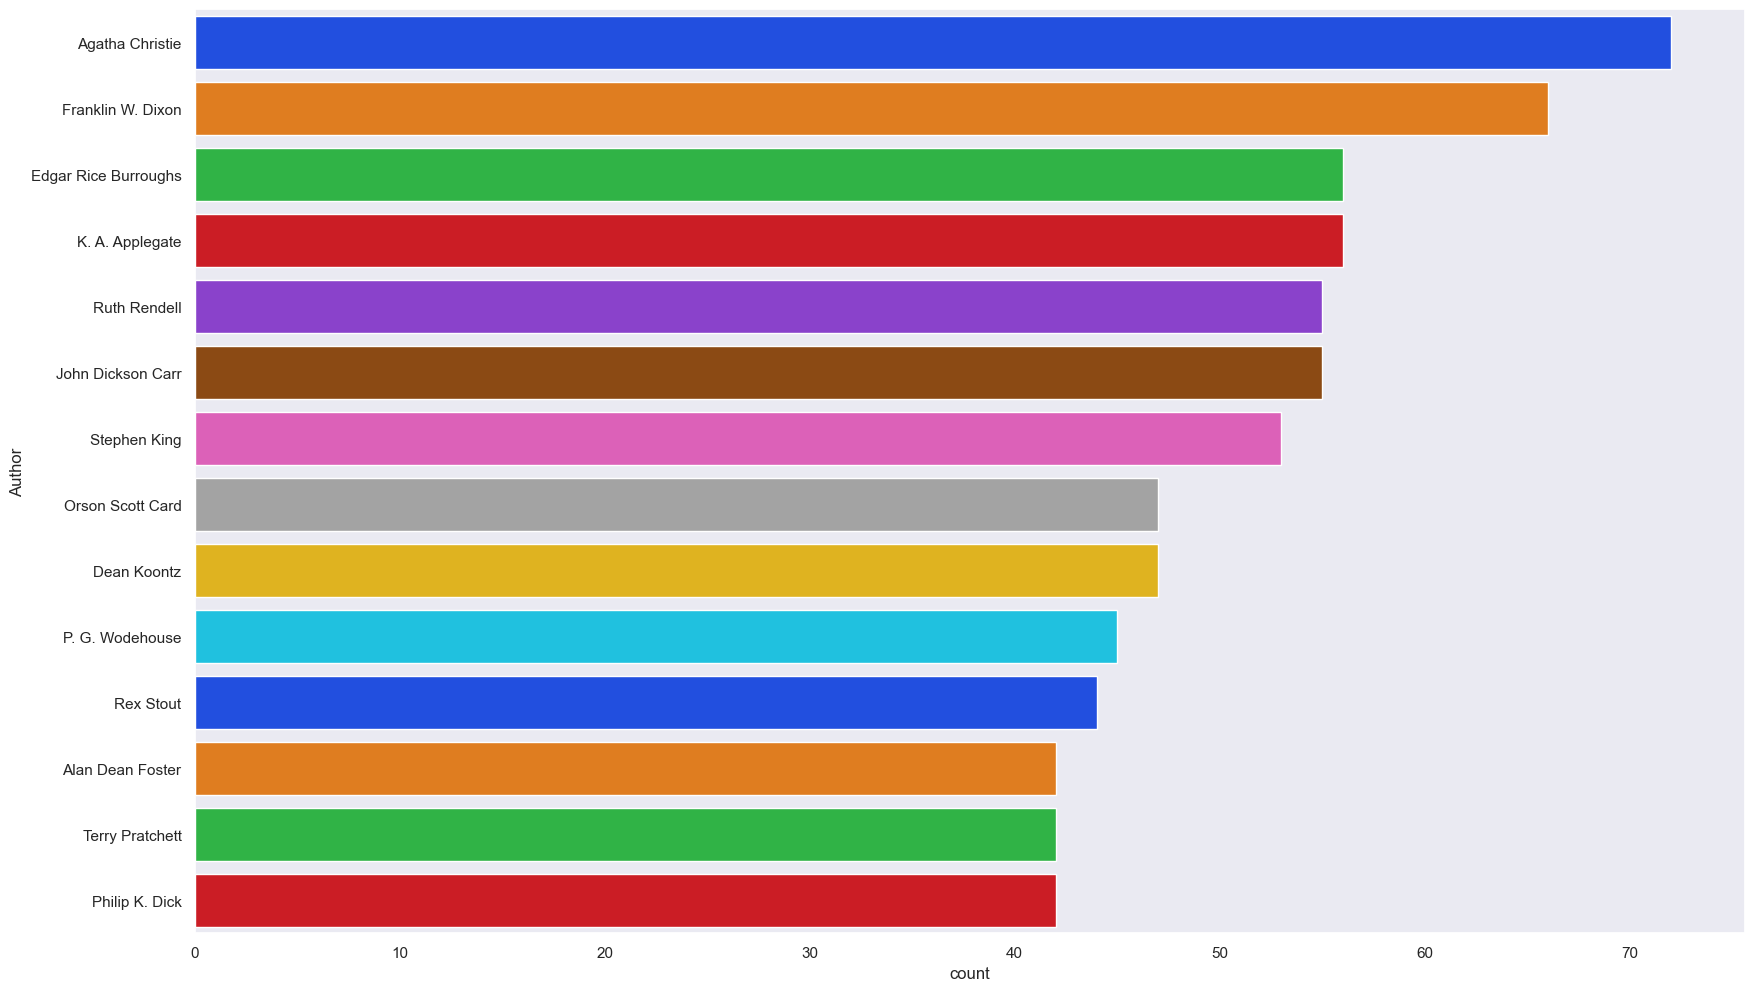

In [10]:
#Authors
#Year released
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="Author", data=books, palette="bright", order=books['Author'].value_counts().index[1:15])

# Recommendation System

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
books['clean_summary'] = books['clean_summary'].fillna('')
tfidf_matrix = tfidf.fit_transform(books['clean_summary'])
tfidf_matrix.shape

/var/folders/12/06cl1m6x4992t10_b5krgjhc0000gn/T/ipykernel_93353/1520528061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['clean_summary'] = books['clean_summary'].fillna('')


(12841, 113239)

In [13]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
indices = pd.Series(books.index, index=books['BookTitle']).drop_duplicates()

In [15]:
#Defining the recommendation system
def get_recommendations_with_similarity(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 similar books
    book_indices = [i[0] for i in sim_scores]
    
    # Extract the similarity scores for each recommendation
    similarity_scores = [i[1] for i in sim_scores]
    
    # Retrieve the book details for recommendations
    recommendations = books[['BookTitle', 'clean_summary']].iloc[book_indices]
    
    # Combine the recommendations with their corresponding similarity scores
    recommendations_with_similarity = recommendations.copy()
    recommendations_with_similarity['similarity_score'] = similarity_scores
    
    return recommendations_with_similarity

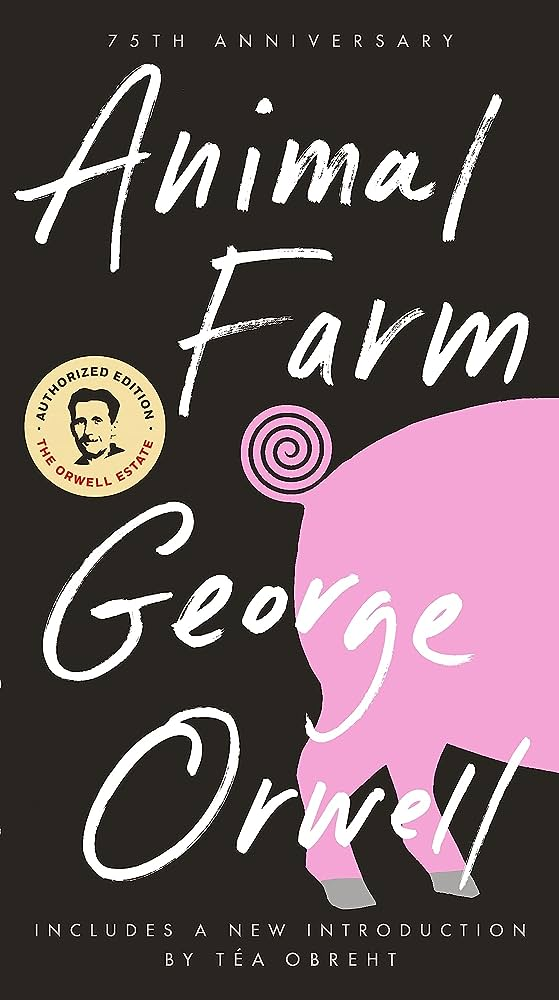

In [16]:
get_recommendations_with_similarity('Animal Farm')

,BookTitle,clean_summary,similarity_score
9989,Snowball's Chance,the story begins with the death of napoleon the original antagonist of animal farm the animals of the farm fearing what will become of them learn that snowball is alive and well and snowball returns to the farm to encourage capitalism a second windmill is soon built alongside the first and the t...,0.469170
6869,Freddy Goes to Florida,freddy was an intelligent pig that lived on the bean farm to avoid the cold winter at their farm in upstate new york the animals decided to vacation in florida at first charles the rooster is prevented from joining them by his acerbic wife henrietta the animals encounter a man and a boy who wish...,0.228821
8991,The Divine Folly,two english brothers travel across europe as members of a secret society that is plotting the assassination of napoleon iii,0.182405
11480,Moscow 1812: Napoleon's Fatal March,napoleon i of france was at the time a very prominent military and political figure desiring to create a french governed europe he succeeded in annexing many countries to france placing his relatives and friends as monarchs in those countries he managed to subdue prussia and force her to become ...,0.172583
6408,The True Story of the Three Little Pigs,the book tries to show that the wolf from the three little pigs does not necessarily have to be big and bad the wolf justifies his journeys to the little pigs houses as needing to ask for some sugar to bake a cake for his dear grannys birthday his huffing and puffing as him having a cold and sne...,0.165805


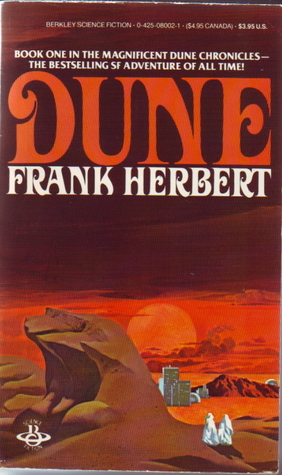

In [17]:
get_recommendations_with_similarity('Dune')

,BookTitle,clean_summary,similarity_score
7950,The Road,an unnamed father and his young son journey across a grim post apocalyptic landscape some years after a major unexplained cataclysm has destroyed civilization and most life on earth the land is filled with ash and devoid of living animals and vegetation many of the remaining human survivors have...,0.230737
1582,The Giving Tree,the giving tree is a tale about a relationship between a young boy and a tree the tree always provides the boy with what he wants branches on which to swing shade in which to sit and apples to eat as the boy grows older he requires more and more of the tree the tree loves the boy very much and g...,0.207304
1920,The Polar Express,as the story starts off a young boy who used to adore christmas hears a train whistle roar to his astonishment he finds the train is waiting for him he sees a conductor who then proceeds to look up at his window he runs downstairs he opens the door the conductor asks him well are you coming he a...,0.186031
16494,The Summer Birds,charlotte and emma makepeace are children living with their grandfather elijah in a country house in the south downs in southern england named aviary hall the house is decorated with stuffed birds and images of birds on the way to their small english village school they meet and befriend a myste...,0.184326
5045,Sorcerer's Apprentice,the novel is set in the sarladais the dordogne region of france an adolescent boy is sent to live with a year old priest who becomes his teacher and spiritual mentor and exerts a powerful control over the boy he abuses him physically and sexually but the boy willingly accepts his punishment the ...,0.180947


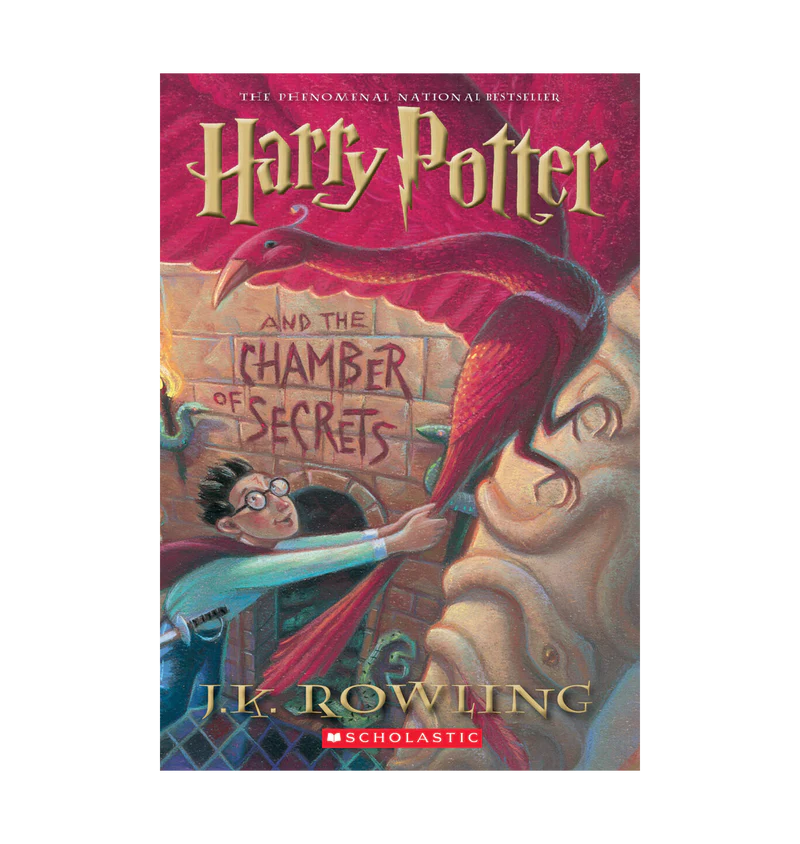

In [18]:
get_recommendations_with_similarity("Harry Potter and the Chamber of Secrets")

,BookTitle,clean_summary,similarity_score
8890,The Separation,on a field trip to the beach rachel is exploring tide pools when she loses an earring in the water wishing to get it back she comes across a starfish acquires it and morphs into it retrieving the earring unfortunately before she can demorph a child chops her in half thanks to the regenerative pr...,0.193897
184,Jane Eyre,the novel begins with a ten year old orphan named jane eyre who is living with her maternal uncles family the reeds as her uncles dying wish janes parents died of typhus jane s aunt sarah reed does not like her and treats her worse than a servant and discourages and at times forbids her children...,0.187899
7827,Sender Unknown,mark a young man has just moved into a grand new house in a new neighborhood so that he can hold a company party at his house he doesnt like his new house and would prefer living in his small cottage on the outskirts of town but has no choice while moving in mark discovers that hard copies of ma...,0.185567
10790,Sundays at Tiffany's,the book opens with jane margaux and her imaginary friend michael spending a sunday at the st regis plaza in new york city eating ice cream together which they do every sunday michael is an imaginary friend who is randomly assigned to children who need extra support and guidance however he is ca...,0.161287
9418,A Week in the Woods,fifth grader mark robert chelmsley is moving from his home in scarsdale new york to new hampshire in the middle of february at the local school hardy elementary school mark initially decides to ignore everyone however after camping out in the old barn in his yard he decides to become more friend...,0.161050
